In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv('item-2018-06-01-2018-07-05.csv')
item = pd.DataFrame(df)
item.head(10)

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0
5,2018-06-01,D007,1,160905,194904,3.522,35.22,10.0,n,0.0
6,2018-06-01,D007,3,250458,56371,1.000,8.00,8.0,n,0.0
7,2018-06-01,D007,3,250241,75124,12.000,30.00,2.5,n,0.0
8,2018-06-01,D007,8,5346,195988,1.000,4.90,5.8,m,-0.9
9,2018-06-01,D007,8,5346,3096,1.000,8.90,12.9,p,-4.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732761 entries, 0 to 1732760
Data columns (total 10 columns):
SDATE              object
STORE_CODE         object
POSID              int64
BASK_CODE          int64
PROD_CODE          int64
ITEM_QUANTITY      float64
ITEM_SPEND         float64
NORMAL_PRICE       float64
DISCOUNT_TYPE      object
DISCOUNT_AMOUNT    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 132.2+ MB


In [39]:
item['sales'] = item['ITEM_QUANTITY']*item['ITEM_SPEND']
item.head(10)

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT,sales
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3,1.70000
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0,1.00000
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0,99.00000
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9,9.90000
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0,60.21918
5,2018-06-01,D007,1,160905,194904,3.522,35.22,10.0,n,0.0,124.04484
6,2018-06-01,D007,3,250458,56371,1.000,8.00,8.0,n,0.0,8.00000
7,2018-06-01,D007,3,250241,75124,12.000,30.00,2.5,n,0.0,360.00000
8,2018-06-01,D007,8,5346,195988,1.000,4.90,5.8,m,-0.9,4.90000
9,2018-06-01,D007,8,5346,3096,1.000,8.90,12.9,p,-4.0,8.90000


Text(0.5, 1.0, 'sales top10')

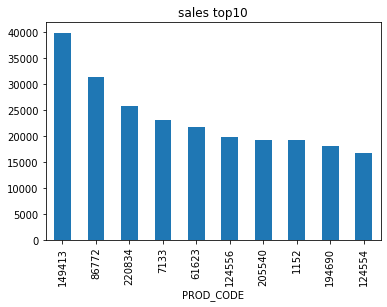

In [40]:
#获取产品数量大于0，按商品货号分组，对商品数量进行求和，从大到小进行排序，得到销售量前十的商品
item[item['ITEM_QUANTITY']>0].groupby('PROD_CODE')['ITEM_QUANTITY'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("sales top10")


In [41]:
#获取产品数量大于0，按商品货号分组，对销售金额进行求和，从大到小进行排序，得到交易额前十的商品
great_sales=item[item['ITEM_QUANTITY']>0].groupby('PROD_CODE')['sales'].sum().sort_values(ascending=False)
great_sales.head(10)

PROD_CODE
220834    6.579461e+07
149413    5.523005e+07
7137      5.371496e+07
101421    4.115185e+07
11929     3.063493e+07
7133      2.582701e+07
220320    1.659394e+07
199639    1.496316e+07
1157      1.232511e+07
199628    1.165406e+07
Name: sales, dtype: float64

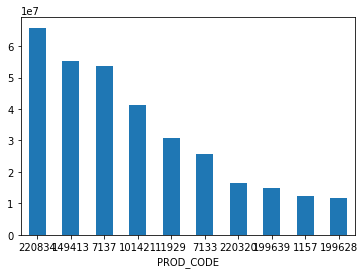

In [42]:
great_sales.head(10).plot(kind='bar',alpha=1,rot=0)
plt.show()
#销售额排名前十的产品销售额差距比较大。

In [43]:
#哪天的销售额最高，可看出月中的销售额偏高
item[item['ITEM_QUANTITY']>0].groupby('SDATE')['ITEM_QUANTITY'].sum().sort_values(ascending=False).head(20)

SDATE
2018-06-17    152630.355
2018-06-18    144507.245
2018-06-16    121575.940
2018-06-13     89970.297
2018-06-15     86899.140
2018-06-03     80749.489
2018-06-02     79518.920
2018-06-01     78168.366
2018-06-10     77137.731
2018-06-30     76815.062
2018-07-01     73839.758
2018-06-14     72425.738
2018-06-27     71612.438
2018-07-03     71609.276
2018-06-05     70539.302
2018-07-04     69428.277
2018-06-09     68745.181
2018-07-02     67429.814
2018-06-23     63536.020
2018-06-29     63297.312
Name: ITEM_QUANTITY, dtype: float64

In [44]:
#客单价，即平均交易金额，是指平均每个客户交易金额，客单价等于成交金额/成交用户数。
#销售额是由客单价和用户数所决定的，要提升产品的销售额，除了尽可能多地吸引客流，增加顾客交易次数以外，提高客单价也是非常重要的途径。
sumPrice=item[item['ITEM_QUANTITY']>0]['sales'].sum()
countID=item[item['ITEM_QUANTITY']>0]['SDATE'].count()
avgPrice = sumPrice/countID
print(avgPrice)

281.8500158125718


In [45]:
#销售量后十的商品
quantity = item[item['ITEM_QUANTITY']>0].groupby('PROD_CODE')['ITEM_QUANTITY'].sum().sort_values(ascending=False)
quantity.tail(10)


PROD_CODE
152624    0.106
207123    0.102
221623    0.100
209747    0.086
178247    0.086
223171    0.086
189718    0.064
24925     0.048
56482     0.046
207282    0.036
Name: ITEM_QUANTITY, dtype: float64

In [46]:
#销售额后十的商品
great_sales=item[item['ITEM_QUANTITY']>0].groupby('PROD_CODE')['sales'].sum().sort_values(ascending=False)
great_sales.tail(10)

PROD_CODE
207123    0.34986
185711    0.34848
221623    0.27600
115651    0.24864
223171    0.24854
209747    0.18920
189718    0.16192
207282    0.06156
56482     0.05290
24925     0.03936
Name: sales, dtype: float64

In [47]:
#分析销量和销售额最后100个的交集，如果这些产品的销量和销售额都不行，需要看看是不是要优化或者下架。
problem_prod = quantity.tail(100).index.intersection(great_sales.tail(100).index)
problem_prod

Int64Index([ 24893,  21710,  21814,  71459,  56483,  26747,  21793,  77166,
            211183, 210413, 222266,  24924, 214590, 219564, 186356,  72785,
             24914, 211920, 221175, 211914, 222366, 222042, 208335, 218828,
            185153, 208183, 217584,  60360, 207276,  60839,  26703, 218821,
             24892,  24917, 189543, 214589, 161349,  72801,  21920, 208177,
            214493,  21700, 211912, 106457, 185711, 213611, 115651, 152624,
            207123, 221623, 209747, 178247, 223171, 189718,  24925,  56482,
            207282],
           dtype='int64', name='PROD_CODE')

In [48]:
df_1=pd.read_csv('Basket-2018-06-01-2018-07-05.csv')
basket = pd.DataFrame(df_1)
basket.head(10)

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018-06-01,D007,3,250458,8.00
1,2018-06-01,D007,3,250200,32.70
2,2018-06-01,D007,1,161068,16.80
3,2018-06-01,D007,8,5325,30.40
4,2018-06-01,D007,8,5361,191.30
5,2018-06-01,D007,3,250225,77.27
6,2018-06-01,D007,3,250309,72.07
7,2018-06-01,D007,4,47502,27.21
8,2018-06-01,D007,3,250520,11.80
9,2018-06-01,D007,1,160957,141.82


In [49]:
#根据篮子数据，按照日期分组，对每天的收入量进行统计
basket[basket['BASK_SPEND']>0].groupby('SHOP_DATETIME')['BASK_SPEND'].sum().sort_values(ascending=False).head(10)

SHOP_DATETIME
2018-06-17    1510911.65
2018-06-18    1262614.63
2018-06-16    1174917.21
2018-06-15     778783.56
2018-06-02     730030.08
2018-06-13     727913.43
2018-06-30     721941.00
2018-06-01     719667.99
2018-06-10     705195.22
2018-06-03     685279.36
Name: BASK_SPEND, dtype: float64

In [50]:
#在item表中提取日期中的月份，添加一列，以为月份分组作准备
import datetime
from datetime import datetime

dt = item["SDATE"]
dt = dt.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
item['month'] = dt.map(lambda x: x.month)

item.head(1)

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT,sales,month
0,2018-06-01,D007,3,250451,29405,1.0,1.7,2.0,m,-0.3,1.7,6


In [51]:
#在basket表中提取日期中的月份，添加一列，以为月份分组作准备
import datetime
from datetime import datetime

dt = basket["SHOP_DATETIME"]
dt = dt.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
basket['month'] = dt.map(lambda x: x.month)

basket.head(1)

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND,month
0,2018-06-01,D007,3,250458,8.0,6


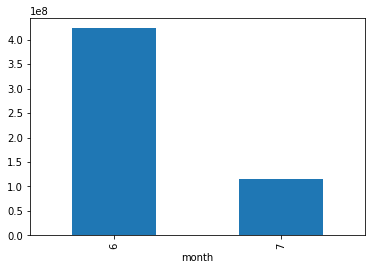

In [52]:
g_month_1 = basket.groupby('month')
g_month_2 = item.groupby('month')
#每月消费总金额
g_month_2.sales.sum().plot(kind='bar')
#可见7月销售额下降

In [53]:
#通过折扣进行分类，计算每类折扣的实际打折力度
discount=item.groupby(['DISCOUNT_TYPE']).sum()[['ITEM_SPEND']]
discount.sort_values('ITEM_SPEND',ascending=False,inplace=True)
discount['percent']=discount['ITEM_SPEND'].cumsum()/discount['ITEM_SPEND'].sum()
discount.reset_index()

,DISCOUNT_TYPE,ITEM_SPEND,percent
0,n,1.443738e+07,0.648135
1,p,5.333506e+06,0.887571
2,m,2.149204e+06,0.984055
3,v,1.905812e+05,0.992610
4,x,9.153040e+04,0.996719
5,q,4.557680e+04,0.998765
6,Z,2.390443e+04,0.999839
7,s,3.573290e+03,0.999999
8,h,2.150000e+01,1.000000


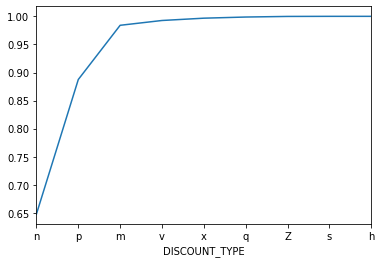

In [54]:
#通过可视化，得出n,p,m,v类折扣力度是最大的
discount['percent'].plot()

In [55]:
price = item[item['NORMAL_PRICE']>0].groupby('PROD_CODE')['NORMAL_PRICE'].sum().sort_values(ascending=False)
price.head(10)

PROD_CODE
136839    249375.0
60205     231052.0
7137      163732.0
75283     154067.2
72750     147821.2
154900    146270.0
219118    142080.0
21835     141041.2
72828     124731.6
147291    123372.0
Name: NORMAL_PRICE, dtype: float64

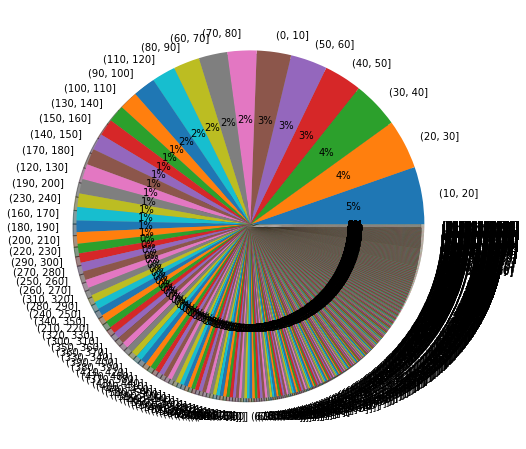

In [56]:
bins = np.arange(0,25000,10)
price_cut = pd.cut(price,bins).value_counts()
plt.figure(figsize=(12,8))
m = plt.pie(x=price_cut.values,labels=price_cut.index,autopct='%d%%',shadow=True)

In [57]:
# 用户行为分析
customer = basket[['BASK_CODE','SHOP_DATETIME', 'BASK_SPEND']].sort_values(['SHOP_DATETIME']).groupby('BASK_CODE')
customer.head()

,BASK_CODE,SHOP_DATETIME,BASK_SPEND
0,250458,2018-06-01,8.00
215287,161017,2018-06-01,9.90
215286,161158,2018-06-01,4.00
215285,250476,2018-06-01,86.40
215284,5399,2018-06-01,23.20
215283,5398,2018-06-01,28.73
215282,161038,2018-06-01,57.92
215281,250438,2018-06-01,67.20
215280,160962,2018-06-01,3.00
215279,35068,2018-06-01,86.70


In [60]:
# 每个用户平均消费
grouped_Customer.count().describe()

,SHOP_DATETIME,BASK_SPEND
count,281211.000000,281211.000000
mean,2.032467,2.032467
std,1.078907,1.078907
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,7.000000,7.000000


In [64]:
basket['SHOP_DATETIME'] = pd.to_datetime(basket.SHOP_DATETIME,format='%Y-%m-%d')

In [68]:
#RFM模型分析
rfm = basket.pivot_table(index = 'BASK_CODE',
                    values = ['STORE_CODE','BASK_SPEND','SHOP_DATETIME'],
                    aggfunc= {'BASK_CODE':'count',
                             'BASK_SPEND':'sum',
                             'SHOP_DATETIME':'max'})
# 所有用户最大的交易日期为标准，求每笔交易的时间间隔即为R
rfm['R'] = (rfm.SHOP_DATETIME.max() - rfm.SHOP_DATETIME)/np.timedelta64(1,'D')
# 每个客户的总销量即为F，总销售额即为M
rfm.rename(columns={'BASK_CODE':'F','BASK_SPEND':'M'},inplace = True)
rfm.head()

,F,M,SHOP_DATETIME,R
BASK_CODE,,,,
961,1,25.0,2018-06-18,17.0
962,1,132.1,2018-06-18,17.0
964,1,28.0,2018-06-18,17.0
965,1,40.0,2018-06-18,17.0
966,1,12.5,2018-06-18,17.0


In [69]:
# 基于平均值做比较，超过均值为1，否则为0
rfm[['R','F','M']].apply(lambda x:x-x.mean())
 
def rfm_func(x):
    level =x.apply(lambda x:'1'if x>0 else '0')
    level =level.R +level.F +level.M
    d = {
        "111":"重要价值客户",
        "011":"重要保持客户",
        "101":"重要挽留客户",
        "001":"重要发展客户",
        "110":"一般价值客户",
        "010":"一般保持客户",
        "100":"一般挽留客户",
        "000":"一般发展客户"
    }
    result = d[level]
    return result
 
rfm['label']= rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis =1)
rfm.head()

,F,M,SHOP_DATETIME,R,label
BASK_CODE,,,,,
961,1,25.0,2018-06-18,17.0,一般挽留客户
962,1,132.1,2018-06-18,17.0,重要挽留客户
964,1,28.0,2018-06-18,17.0,一般挽留客户
965,1,40.0,2018-06-18,17.0,一般挽留客户
966,1,12.5,2018-06-18,17.0,一般挽留客户


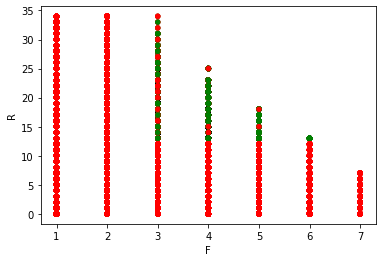

In [70]:
#对重要价值客户和非重要价值客户进行可视化展示。
rfm.loc[rfm.label=='重要价值客户','color']='g'
rfm.loc[~(rfm.label=='重要价值客户'),'color']='r'
rfm.plot.scatter('F','R',c= rfm.color)

通过RFM识别不同的客户群体，能够衡量客户价值和客户利润创收能力，可以指定个性化的沟通和营销服务，为更多的营销决策提供有力支持，为企业创造更大的利益。

In [79]:
#在basket表中提取日期中的日，添加一列
basket['SHOP_DATETIME'] = pd.to_datetime(basket['SHOP_DATETIME'],format='%Y/%m/%d %H:%M:%S')
basket['day'] = basket['SHOP_DATETIME'].dt.day

In [80]:
#新用户、活跃用户、不活跃用户和回归用户分析。
#设置BASK_CODE为索引，month为列名，统计每个月的购买次数。
pivoted_counts = basket.pivot_table(index= 'BASK_CODE',
                               columns= 'day',
                               values= 'SHOP_DATETIME',
                               aggfunc= 'count').fillna(0)
# 大于一次的全部设为1
df_purchase = pivoted_counts.applymap(lambda x:1 if x>0 else 0)
df_purchase.head()

day,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
BASK_CODE,,,,,,,,,,,,,,,,,,,,,
961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


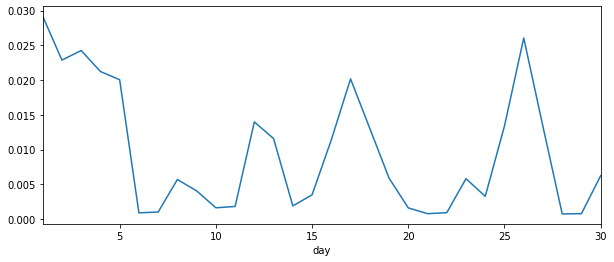

In [87]:
purchase_r = pivoted_counts.applymap(lambda x :1 if x>1 else np.NaN if x==0 else 0)
(purchase_r.sum()/purchase_r.count()).plot(figsize=(10,4))

从上可以发现复购率基本大于0.525，且呈总体上升趋势，说明客户忠诚度高，回购率在年中年末呈峰形态，可能与商家折扣活动或节日有关。